# Monte Carlo - Quadrotor trajectory optimization w/ input rate constraint

In [22]:
# problem definition
include("ex2_problem_data.jl");
# solver functions and variable containers
include("solver_suite.jl");

Scaling rows of H
Scaling components of g


In [3]:
# JuMP
jump.solver!(:mosek,false);

avg_nest_iter_count = 0.0
kmax_mc = 100

for j=1:kmax_mc
    # PIPG+
    pipg.reset_var!(:plus)
    pipg.solver!();

    # PIPG+ w/ restart
    pipg.reset_var!(:plus)
    pipg.solver_proxy!(pipg.z,pipg.v,pipg.w,pipg.κK,pipg.κu,pipg.κx,pipg.rd2o_restrt,
        pipg.rd2K_restrt,pipg.rfval_restrt,prb.restrt_idx)

    # PIPG affine eq.
    pipg.reset_var!(:eq)
    pipg.solver_eq!();
    
    # ADMM
    rival.reset_var!(:admm)
    rival.solver_admm!()
    
    # PDHG
    rival.reset_var!(:cp)
    rival.solver_cp!()
    
    data_mc.rd2o .= ((1-1/j) .* data_mc.rd2o) .+ (pipg.rd2o ./ j) 
    data_mc.rd2o_rst .= ((1-1/j) .* data_mc.rd2o_rst) .+ (pipg.rd2o_restrt ./ j) 
    data_mc.rd2o_eq .= ((1-1/j) .* data_mc.rd2o_eq) .+ (pipg.rd2o_eq ./ j) 
    data_mc.rd2o_admm .= ((1-1/j) .* data_mc.rd2o_admm) .+ (rival.rd2o ./ j) 
    data_mc.rd2o_cp .= ((1-1/j) .* data_mc.rd2o_cp) .+ (rival.rd2o_2 ./ j)
    
    data_mc.max_rd2o .= [max(data_mc.max_rd2o[k],abs(pipg.rd2o[k])) for k=1:prb.kmax]
    data_mc.max_rd2o_rst .= [max(data_mc.max_rd2o_rst[k],abs(pipg.rd2o_restrt[k])) for k=1:prb.kmax]
    data_mc.max_rd2o_eq .= [max(data_mc.max_rd2o_eq[k],abs(pipg.rd2o_eq[k])) for k=1:prb.kmax]
    data_mc.max_rd2o_admm .= [max(data_mc.max_rd2o_admm[k],abs(rival.rd2o[k])) for k=1:prb.kmax]
    data_mc.max_rd2o_cp .= [max(data_mc.max_rd2o_cp[k],abs(rival.rd2o_2[k])) for k=1:prb.kmax]
    
    data_mc.rd2K .= ((1-1/j) .* data_mc.rd2K) .+ (pipg.rd2K ./ j) 
    data_mc.rd2K_rst .= ((1-1/j) .* data_mc.rd2K_rst) .+ (pipg.rd2K_restrt ./ j) 
    data_mc.rd2K_eq .= ((1-1/j) .* data_mc.rd2K_eq) .+ (pipg.rd2K_eq ./ j) 
    data_mc.rd2K_admm .= ((1-1/j) .* data_mc.rd2K_admm) .+ (rival.rd2K ./ j) 
    data_mc.rd2K_cp .= ((1-1/j) .* data_mc.rd2K_cp) .+ (rival.rd2K_2 ./ j)
    
    data_mc.max_rd2K .= [max(data_mc.max_rd2K[k],abs(pipg.rd2K[k])) for k=1:prb.kmax]
    data_mc.max_rd2K_rst .= [max(data_mc.max_rd2K_rst[k],abs(pipg.rd2K_restrt[k])) for k=1:prb.kmax]
    data_mc.max_rd2K_eq .= [max(data_mc.max_rd2K_eq[k],abs(pipg.rd2K_eq[k])) for k=1:prb.kmax]
    data_mc.max_rd2K_admm .= [max(data_mc.max_rd2K_admm[k],abs(rival.rd2K[k])) for k=1:prb.kmax]
    data_mc.max_rd2K_cp .= [max(data_mc.max_rd2K_cp[k],abs(rival.rd2K_2[k])) for k=1:prb.kmax]
    
    avg_nest_iter_count = avg_nest_iter_count + sum(rival.nest_iter_count) ./ prb.kmax
end

avg_nest_iter_count = avg_nest_iter_count / kmax_mc
    
print("\n\nAverage Nesterov iterations in ADMM : $(avg_nest_iter_count)")

mosek termination status: OPTIMAL
PIPG+ relative distance to optimum: 4.557817110878492e-11
PIPG+ restarted w/ 300 relative distance to optimum: 2.518037809093859e-19
PIPGeq relative distance to optimum: 1.4044698702866543e-9
ADMM relative distance to optimum: 3.458487213150722e-8
Chambolle and Pock relative distance to optimum: 1.5830262108611252e-10
PIPG+ relative distance to optimum: 3.698394737745226e-11
PIPG+ restarted w/ 300 relative distance to optimum: 4.2759779405665333e-19
PIPGeq relative distance to optimum: 5.999403058484164e-10
ADMM relative distance to optimum: 5.24151039439793e-8
Chambolle and Pock relative distance to optimum: 1.3014880344337772e-10
PIPG+ relative distance to optimum: 6.420140604825021e-11
PIPG+ restarted w/ 300 relative distance to optimum: 6.91594672342421e-20
PIPGeq relative distance to optimum: 2.3472034871971386e-9
ADMM relative distance to optimum: 3.788335695027359e-8
Chambolle and Pock relative distance to optimum: 1.1778469843878867e-10
PIPG+ r

Chambolle and Pock relative distance to optimum: 2.3432949640443996e-10
PIPG+ relative distance to optimum: 3.500895764239786e-11
PIPG+ restarted w/ 300 relative distance to optimum: 7.609216526137315e-20
PIPGeq relative distance to optimum: 1.8547802491569307e-9
ADMM relative distance to optimum: 4.178936607708706e-8
Chambolle and Pock relative distance to optimum: 1.3283681385202616e-10
PIPG+ relative distance to optimum: 4.7872445254566864e-11
PIPG+ restarted w/ 300 relative distance to optimum: 3.1275485007041465e-19
PIPGeq relative distance to optimum: 1.893930847203818e-9
ADMM relative distance to optimum: 3.042439334348265e-8
Chambolle and Pock relative distance to optimum: 1.7330528807316448e-10
PIPG+ relative distance to optimum: 2.6691181849243274e-11
PIPG+ restarted w/ 300 relative distance to optimum: 4.1202742099898787e-20
PIPGeq relative distance to optimum: 1.0752290373067707e-9
ADMM relative distance to optimum: 4.162918878830475e-8
Chambolle and Pock relative distance 

PIPGeq relative distance to optimum: 1.596939896863049e-9
ADMM relative distance to optimum: 3.077220217831979e-8
Chambolle and Pock relative distance to optimum: 1.814186619476163e-10
PIPG+ relative distance to optimum: 4.136897360304591e-11
PIPG+ restarted w/ 300 relative distance to optimum: 2.19140731554389e-19
PIPGeq relative distance to optimum: 1.4064218948620737e-9
ADMM relative distance to optimum: 3.805748649575676e-8
Chambolle and Pock relative distance to optimum: 1.786350369442906e-10
PIPG+ relative distance to optimum: 4.803757850277716e-11
PIPG+ restarted w/ 300 relative distance to optimum: 8.84546032515383e-20
PIPGeq relative distance to optimum: 1.2429925084432007e-9
ADMM relative distance to optimum: 3.790283720136442e-8
Chambolle and Pock relative distance to optimum: 1.9861093037552848e-10
PIPG+ relative distance to optimum: 4.553852961382772e-11
PIPG+ restarted w/ 300 relative distance to optimum: 1.1312539128946408e-19
PIPGeq relative distance to optimum: 1.39489

PIPGeq relative distance to optimum: 2.1577982456082524e-9
ADMM relative distance to optimum: 2.7129708738109154e-8
Chambolle and Pock relative distance to optimum: 1.8815065537686908e-10
PIPG+ relative distance to optimum: 4.9238254955604276e-11
PIPG+ restarted w/ 300 relative distance to optimum: 2.660095046368863e-19
PIPGeq relative distance to optimum: 1.2895979394932877e-9
ADMM relative distance to optimum: 1.7031303072215448e-8
Chambolle and Pock relative distance to optimum: 1.1427454247282473e-10
PIPG+ relative distance to optimum: 4.56698772674752e-11
PIPG+ restarted w/ 300 relative distance to optimum: 3.968906741234407e-20
PIPGeq relative distance to optimum: 1.7563788318215188e-9
ADMM relative distance to optimum: 2.419845099945224e-8
Chambolle and Pock relative distance to optimum: 3.6368823302230133e-10
PIPG+ relative distance to optimum: 4.843738099565199e-11
PIPG+ restarted w/ 300 relative distance to optimum: 3.55685977591237e-19
PIPGeq relative distance to optimum: 1.

In [19]:
using JLD

In [5]:
# save data
save("ex2_monte_carlo.jld","rd2o",data_mc.rd2o,"rd2o_rst",data_mc.rd2o_rst,"rd2o_eq",data_mc.rd2o_eq,
    "rd2o_admm",data_mc.rd2o_admm,"rd2o_cp",data_mc.rd2o_cp,"max_rd2o",data_mc.max_rd2o,"max_rd2o_rst",
    data_mc.max_rd2o_rst,"max_rd2o_eq",data_mc.max_rd2o_eq,"max_rd2o_admm",data_mc.max_rd2o_admm,"max_rd2o_cp",
    data_mc.max_rd2o_cp,"rd2K",data_mc.rd2K,"rd2K_rst",data_mc.rd2K_rst,"rd2K_eq",data_mc.rd2K_eq,"rd2K_admm",
    data_mc.rd2K_admm,"rd2K_cp",data_mc.rd2K_cp,"max_rd2K",data_mc.max_rd2K,"max_rd2K_rst",data_mc.max_rd2K_rst,
    "max_rd2K_eq",data_mc.max_rd2K_eq,"max_rd2K_admm",data_mc.max_rd2K_admm,"max_rd2K_cp",data_mc.max_rd2K_cp);

In [23]:
rd2o = load("ex2_monte_carlo.jld","rd2o")
rd2o_rst = load("ex2_monte_carlo.jld","rd2o_rst")
rd2o_eq = load("ex2_monte_carlo.jld","rd2o_eq")
rd2o_admm = load("ex2_monte_carlo.jld","rd2o_admm")
rd2o_cp  = load("ex2_monte_carlo.jld","rd2o_cp")

max_rd2o = load("ex2_monte_carlo.jld","max_rd2o")
max_rd2o_rst = load("ex2_monte_carlo.jld","max_rd2o_rst")
max_rd2o_eq = load("ex2_monte_carlo.jld","max_rd2o_eq")
max_rd2o_admm = load("ex2_monte_carlo.jld","max_rd2o_admm")
max_rd2o_cp  = load("ex2_monte_carlo.jld","max_rd2o_cp")

rd2K = load("ex2_monte_carlo.jld","rd2K")
rd2K_rst = load("ex2_monte_carlo.jld","rd2K_rst")
rd2K_eq = load("ex2_monte_carlo.jld","rd2K_eq")
rd2K_admm = load("ex2_monte_carlo.jld","rd2K_admm")
rd2K_cp  = load("ex2_monte_carlo.jld","rd2K_cp")

max_rd2K = load("ex2_monte_carlo.jld","max_rd2K")
max_rd2K_rst = load("ex2_monte_carlo.jld","max_rd2K_rst")
max_rd2K_eq = load("ex2_monte_carlo.jld","max_rd2K_eq")
max_rd2K_admm = load("ex2_monte_carlo.jld","max_rd2K_admm")
max_rd2K_cp  = load("ex2_monte_carlo.jld","max_rd2K_cp")

data_mc.set_rd2o_data!(rd2o,rd2o_rst,rd2o_eq,rd2o_admm,rd2o_cp,
    max_rd2o,max_rd2o_rst,max_rd2o_eq,max_rd2o_admm,max_rd2o_cp)

data_mc.set_rd2K_data!(rd2K,rd2K_rst,rd2K_eq,rd2K_admm,rd2K_cp,
    max_rd2K,max_rd2K_rst,max_rd2K_eq,max_rd2K_admm,max_rd2K_cp);

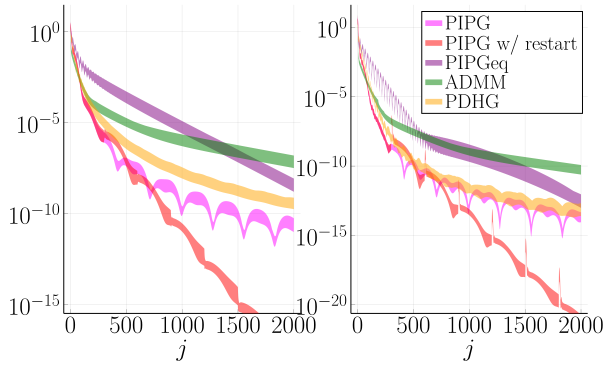

In [24]:
data_mc.plot_solstat()